In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns
sns.set(style='ticks')

import configparser
config = configparser.ConfigParser()

config.read("../final_project_files/env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']

In [2]:
PHI = pd.read_csv(f"{output_dir}\\PHI.csv").set_index('topic_id')

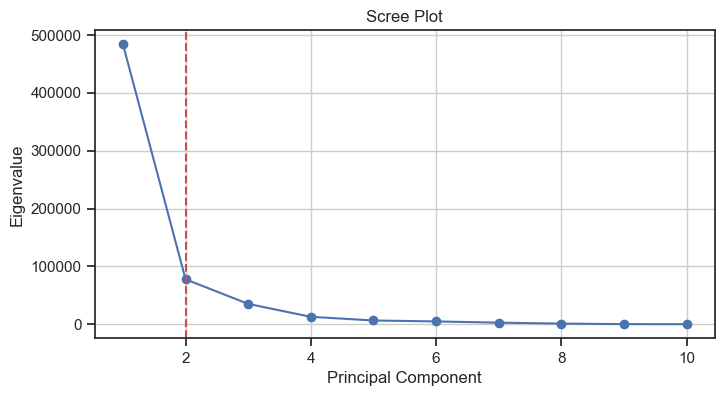

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = PHI.fillna(0)

pca = PCA(n_components=10).fit(X)

# Eigenvalues
eigenvalues = pca.explained_variance_

# Creating a Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

# Optional: Add a line to emphasize the "elbow"
plt.axvline(x=2, color='r', linestyle='--')

plt.grid(True)
plt.show()

In [4]:
n_comps = 2
pca_engine = PCA(n_components=n_comps)

In [5]:
pca = pca_engine.fit_transform(PHI.fillna(0))

In [6]:
DCM = pd.DataFrame(pca, index=PHI.index)
DCM.columns = ['PC{}'.format(i) for i in DCM.columns]

In [7]:
# DCM = pd.concat([DCM, DCM, DCM]).reset_index()
DCM.head()

,PC0,PC1
topic_id,,
T00,-418.088919,-47.241580
T01,-415.131256,-46.639070
T02,319.591138,-114.258580
T03,-415.603234,-45.870182
T04,-112.893050,65.863975


In [8]:
OHCO = ['book_title', 'chap_num']
THETA = pd.read_csv(f"{output_dir}\\THETA.csv").set_index(OHCO)
LIB = pd.read_csv(f"{output_dir}\\LIB_LABELS.csv").set_index(OHCO[:1])[['series','label']]

In [9]:
THETA.head(2)

T00       T01       T02       T03  \
book_title           chap_num                                           
01_a_game_of_thrones 1         0.000197  0.000197  0.000197  0.000197   
                     2         0.000345  0.000345  0.000345  0.000345   

                                    T04       T05       T06       T07  \
book_title           chap_num                                           
01_a_game_of_thrones 1         0.000197  0.000197  0.000197  0.000197   
                     2         0.000345  0.000345  0.000345  0.000345   

                                    T08       T09       T10       T11  \
book_title           chap_num                                           
01_a_game_of_thrones 1         0.000197  0.000197  0.000197  0.000197   
                     2         0.000345  0.000345  0.000345  0.463823   

                                    T12       T13       T14       T15  \
book_title           chap_num                                           
01_a_game_of_thrones 1         0.000197  0.000197  0.000197  0.996260   
                     2         0.000345  0.000345  0.000345  0.529971   

                                    T16       T17       T18       T19  
book_title           chap_num                                          
01_a_game_of_thrones 1         0.000197  0.000197  0.000197  0.000197  
                     2         0.000345  0.000345  0.000345  0.000345

In [10]:
LIB.head(2)

,series,label
book_title,,
01_a_game_of_thrones,ASOIAF,George R.R. Martin: 01_a_game_of_thrones (1996)
01_into_the_wild,Warrior_Cats,Kate Cary: 01_into_the_wild (2003)


In [11]:
df = THETA.groupby(OHCO).mean().join(LIB, on='book_title')\
    .reset_index().set_index(OHCO+['series','label']).T
df.index.name = 'topic_id'
df.head()

book_title                            01_a_game_of_thrones  \
chap_num                                                1    
series                                              ASOIAF   
label      George R.R. Martin: 01_a_game_of_thrones (1996)   
topic_id                                                     
T00                                               0.000197   
T01                                               0.000197   
T02                                               0.000197   
T03                                               0.000197   
T04                                               0.000197   

book_title                                                  \
chap_num                                                2    
series                                              ASOIAF   
label      George R.R. Martin: 01_a_game_of_thrones (1996)   
topic_id                                                     
T00                                               0.000345   
T01                                               0.000345   
T02                                               0.000345   
T03                                               0.000345   
T04                                               0.000345   

book_title                                                  \
chap_num                                                3    
series                                              ASOIAF   
label      George R.R. Martin: 01_a_game_of_thrones (1996)   
topic_id                                                     
T00                                               0.000463   
T01                                               0.000463   
T02                                               0.000463   
T03                                               0.000463   
T04                                               0.000463   

book_title                                                  \
chap_num                                                4    
series                                              ASOIAF   
label      George R.R. Martin: 01_a_game_of_thrones (1996)   
topic_id                                                     
T00                                               0.000207   
T01                                               0.000207   
T02                                               0.000207   
T03                                               0.000207   
T04                                               0.000207   

book_title                                                  \
chap_num                                                5    
series                                              ASOIAF   
label      George R.R. Martin: 01_a_game_of_thrones (1996)   
topic_id                                                     
T00                                               0.000269   
T01                                               0.000269   
T02                                               0.000269   
T03                                               0.000269   
T04                                               0.000269   

book_title                                                  \
chap_num                                                6    
series                                              ASOIAF   
label      George R.R. Martin: 01_a_game_of_thrones (1996)   
topic_id                                                     
T00                                               0.000256   
T01                                               0.000256   
T02                                               0.000256   
T03                                               0.000256   
T04                                               0.000256   

book_title                                                  \
chap_num                                                7    
series                                              ASOIAF   
label      George R.R. Martin: 01_a_game_of_thrones (1996)   
topic_id                  

In [12]:
df2 = df.T.groupby('series').mean().T
#df2.columns.name = None
df2 = df2.stack().to_frame('mean_doc_weight').reset_index()
df2.head()

,topic_id,series,mean_doc_weight
0,T00,ASOIAF,0.000317
1,T00,Last_Dragon_Chronicles,0.007297
2,T00,Warrior_Cats,0.000531
3,T01,ASOIAF,0.000908
4,T01,Last_Dragon_Chronicles,0.009070


In [13]:
df2.shape

(60, 3)

In [14]:
DCM.shape

(20, 2)

In [15]:
df = pd.merge(DCM, df2, on='topic_id', how='right')
# df['label'] = df.topic_id + " " + df.series
df.shape

(60, 6)

In [16]:
df.head()

,topic_id,PC0,PC1,series,mean_doc_weight,label
0,T00,-418.088919,-47.24158,ASOIAF,0.000317,T00 ASOIAF
1,T00,-418.088919,-47.24158,Last_Dragon_Chronicles,0.007297,T00 Last_Dragon_Chronicles
2,T00,-418.088919,-47.24158,Warrior_Cats,0.000531,T00 Warrior_Cats
3,T01,-415.131256,-46.63907,ASOIAF,0.000908,T01 ASOIAF
4,T01,-415.131256,-46.63907,Last_Dragon_Chronicles,0.009070,T01 Last_Dragon_Chronicles


In [21]:
def vis_pcs(M, a, b, label='author', hover_name='topic_id', symbol=None, size=None):
    return px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=size)

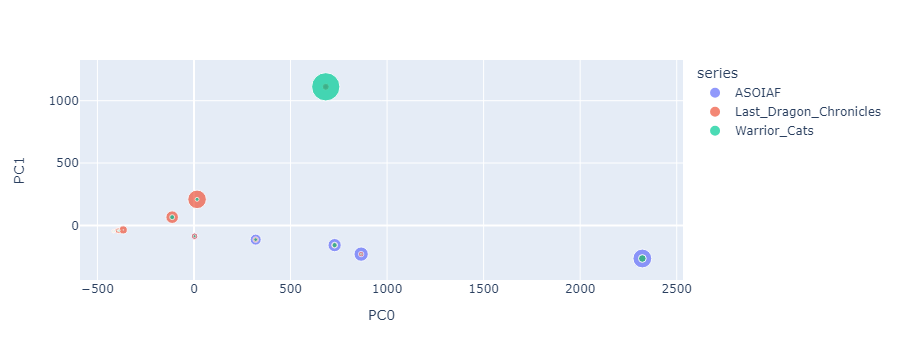

In [22]:
vis_pcs(df, 0, 1, label='series', size='mean_doc_weight')